12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:28 - cmdstanpy - INFO - Chain [1] done processing


            Actual   Predicted
Date                          
2016-01-01       0  114.264659
2016-01-02       3  161.416964
2016-01-03       0  120.134441
2016-01-04       0   98.176547
2016-01-05       3   94.514128
Prophet RMSE: 83.88


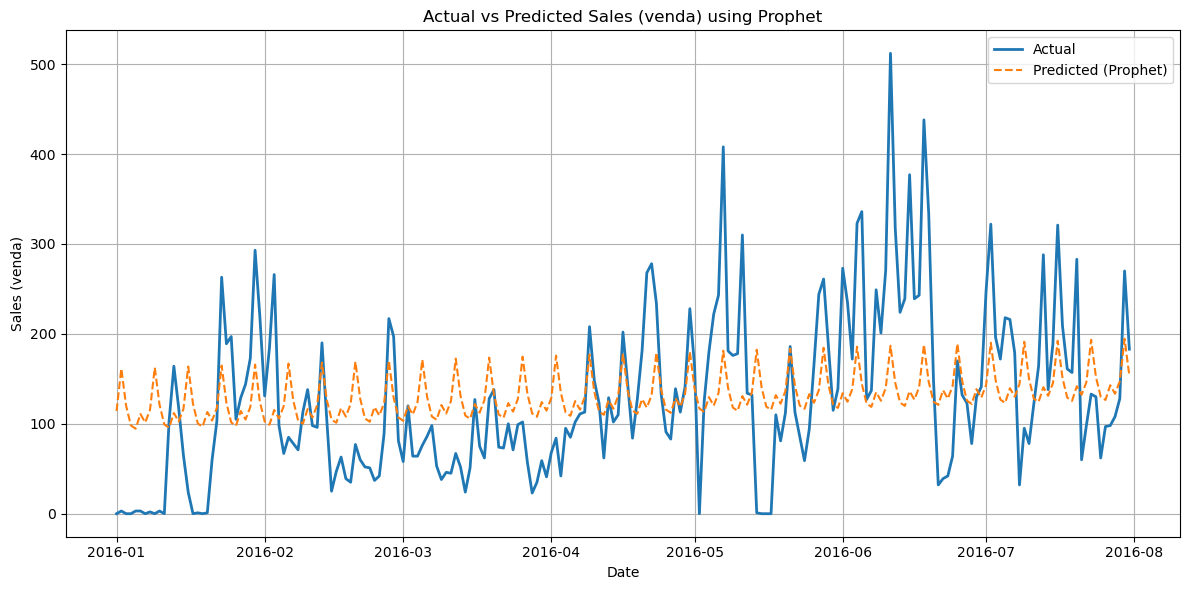

In [5]:
# Import necessary libraries
import pandas as pd  # For data manipulation using DataFrames
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from prophet import Prophet  # Facebook's Prophet library for time series forecasting
from sklearn.metrics import mean_squared_error  # For evaluating model performance using RMSE

# Step 1: Load and prepare data
df = pd.read_csv("C:/Users/User/Downloads/mock_kaggle.csv")  # Load the dataset from a CSV file into a DataFrame
df['data'] = pd.to_datetime(df['data'])  # Convert the 'data' column to datetime format for time series analysis

# Step 2: Rename columns as required by Prophet
df_prophet = df.rename(columns={'data': 'ds', 'venda': 'y'})  # Prophet requires 'ds' (date) and 'y' (target value) column names

# Step 3: Optional - Split into training and test set (e.g., forecast 2016+)
train_df = df_prophet[df_prophet['ds'] < '2016-01-01']  # Use all records before 2016 for training
test_df = df_prophet[df_prophet['ds'] >= '2016-01-01']  # Use data from 2016 onwards for testing/forecasting

# Step 4: Fit the Prophet model
model = Prophet()  # Initialize a new Prophet model
model.fit(train_df)  # Train the model using the training dataset

# Step 5: Predict on test period
future = test_df[['ds']]  # Create a DataFrame containing only future dates we want to forecast
forecast = model.predict(future)  # Generate forecasted values using the Prophet model

# Step 6: Combine actual and predicted values
predictions_df = pd.DataFrame({  # Create a new DataFrame to store results
    'Date': test_df['ds'].values,  # Actual dates
    'Actual': test_df['y'].values,  # Actual observed sales
    'Predicted': forecast['yhat'].values  # Forecasted sales from Prophet ('yhat' is Prophet's prediction column)
})

# Optional: Set date as index
predictions_df.set_index('Date', inplace=True)  # Set 'Date' as the index for easier plotting and comparison

# Step 7: Export to CSV
predictions_df.to_csv("C:/Users/User/Downloads/prophet_predictions.csv")  # Save the results to a CSV file

# Step 8: Preview
print(predictions_df.head())  # Display the first few rows of the results DataFrame

# Compute RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(predictions_df['Actual'], predictions_df['Predicted']))  # Calculate RMSE
print(f"Prophet RMSE: {rmse:.2f}")  # Print RMSE with 2 decimal places

# Plot actual vs predicted sales
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual', linewidth=2)  # Plot actual sales
plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted (Prophet)', linestyle='--')  # Plot predicted sales
plt.title('Actual vs Predicted Sales (venda) using Prophet')  # Set plot title
plt.xlabel('Date')  # Label x-axis
plt.ylabel('Sales (venda)')  # Label y-axis
plt.legend()  # Show legend
plt.grid(True)  # Display gridlines
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot
